# Setup



In [ ]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ThinkComplexity2/raw/master/notebooks/utils.py')

Downloaded utils.py


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

from utils import decorate, savefig

# Set the random seed so the notebook
# produces the same results every time.
np.random.seed(17)

In [ ]:
# make a directory for figures
!mkdir -p figs

In [ ]:
# node colors for drawing networks
colors = sns.color_palette('pastel', 5)
#sns.palplot(colors)
sns.set_palette(colors)

# Directed graph

**The first example is a directed graph that represents a social network with three nodes.**

You can also check [NetworkX Documentation documentation](https://networkx.org/) for more information about building different graphs with NetworkX.


We first create an empty direct graph that contains no nodes and edges

In [ ]:
import networkx as nx

G = nx.DiGraph()

In [ ]:
print(G)

DiGraph with 0 nodes and 0 edges


We can add nodes by using `add_node` method.

In [ ]:
# Here's how we add three different nodes in the graph

G.add_node('Alice')
G.add_node('Bob')
G.add_node('Cate')

Now we can use the `nodes` method to get a list of nodes:

In [ ]:
list(G.nodes())

['Alice', 'Bob', 'Cate']

The `nodes` method returns a NodeView, which can be used in a for loop:

In [ ]:
for node in G.nodes:
  print(node)

Alice
Bob
Cate


We now add edges between nodes by using the `add_edge` method.


In [ ]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Cate')
G.add_edge('Bob', 'Cate')

We can get the list of edges by using `edges` method.

In [ ]:
list(G.edges())

[('Alice', 'Bob'), ('Alice', 'Cate'), ('Bob', 'Cate')]

We can also use the returns from the `edges` method in a for loop:

In [ ]:
for edge in G.edges:
  print(edge)

('Alice', 'Bob')
('Alice', 'Cate')
('Bob', 'Cate')


**Draw the directed graph:**

draw_circular arranges the nodes in a circle and connects them with edges:

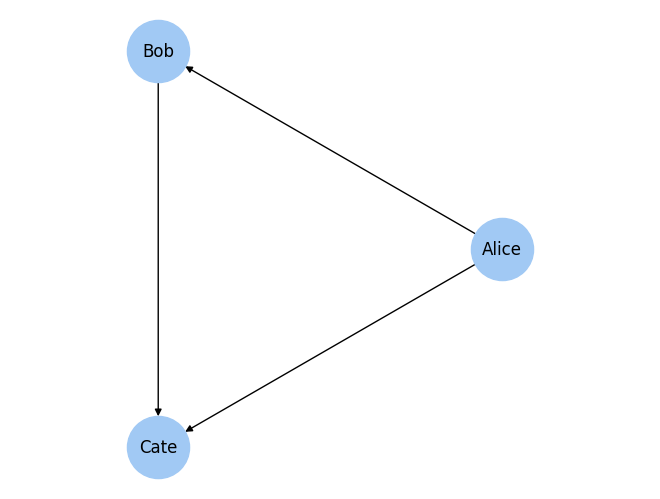

In [ ]:
nx.draw_circular(G,
                 node_color='C0',
                 node_size=2000,
                 with_labels=True)
plt.axis('equal')
plt.show()

# Undirected graph

The second example is an undirected graph that represents cities and the driving times between them.

`positions` is a dictionary that maps from each city to its coordinates.

In [ ]:
positions = dict(Albany=(-74, 43),
                 Boston=(-71, 42),
                 NYC=(-74, 41),
                 Philly=(-75, 40))

positions['Albany']

(-74, 43)

We instantiate **nx.Graph** for an empty undirected graph:

In [ ]:
G = nx.Graph()

In [ ]:
print(G)

Graph with 0 nodes and 0 edges


use `add_nodes_from` to iterate the keys of `positions` and add them as nodes:




In [ ]:
G.add_nodes_from(positions)

In [ ]:
list(G.nodes())

['Albany', 'Boston', 'NYC', 'Philly']

We can create a disctionary to map each edge to the corresponding edge weights, i.e. the driving time from one city to another city in this example.

In [ ]:
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

We iterate over keys of `drive_times` and add edges.



In [ ]:
G.add_edges_from(drive_times)

In [ ]:
for edge in G.edges:
  print(edge)

('Albany', 'Boston')
('Albany', 'NYC')
('Boston', 'NYC')
('NYC', 'Philly')


In [ ]:
list(G.edges())

[('Albany', 'Boston'), ('Albany', 'NYC'), ('Boston', 'NYC'), ('NYC', 'Philly')]

Instead of `draw_circular`, which arranges the nodes in a circle, `draw` method takes the `position` dictionary as the second parameter to draw the undirected graph.

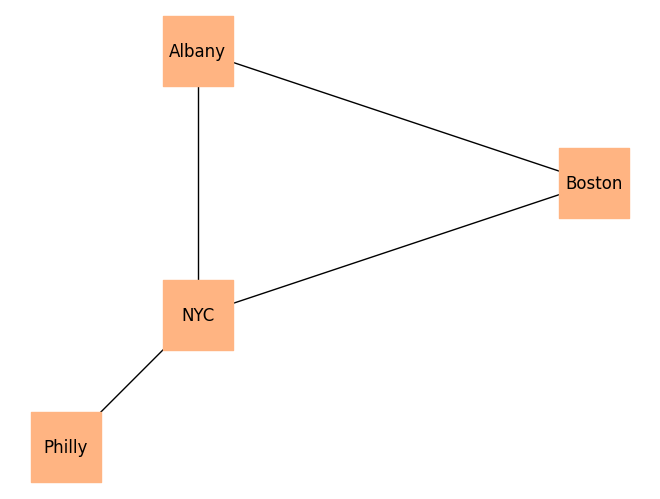

In [ ]:
nx.draw(G, positions,
        node_color='C1',
        node_shape='s',
        node_size=2500,
        with_labels=True)
plt.show()

Check the difference:

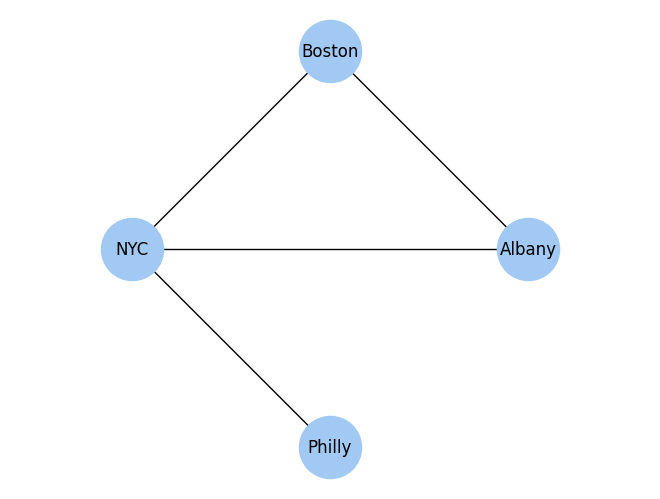

In [ ]:
nx.draw_circular(G,
                 node_color='C0',
                 node_size=2000,
                 with_labels=True)
plt.axis('equal')
plt.show()

# Weighted Graph


We can add the edge weights by using `draw_networkx_edge_labels` to make it as a weighted graph:

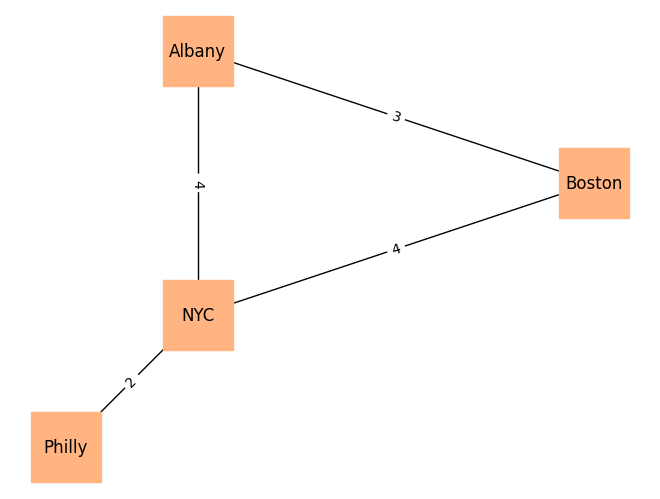

In [ ]:
nx.draw(G, positions,
        node_color='C1',
        node_shape='s',
        node_size=2500,
        with_labels=True)

# add edge labels to graph
nx.draw_networkx_edge_labels(G, positions,
                             edge_labels=drive_times)

plt.axis('equal')
plt.show()
# plt.savefig('weighted_g.png')

# Complete graph

To make a complete graph, we use a [generator function](https://wiki.python.org/moin/Generators) that iterates through all pairs of nodes.

In [ ]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

We create 10 nodes and use `all_pairs` to add edge between every pair of nodes.

In [ ]:
# have a look at all the edges between all nodes

nodes = range(10)
print(list(all_pairs(nodes)))

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


In [ ]:
len(list(all_pairs(nodes)))

45

`make_complete_graph` takes the number of `n` nodes, and returns a new graph with `n` nodes and edges between all pairs of nodes.

In [ ]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

We can make a complete graph with 10 nodes:

In [ ]:
complete = make_complete_graph(10)

In [ ]:
complete.number_of_nodes()

10

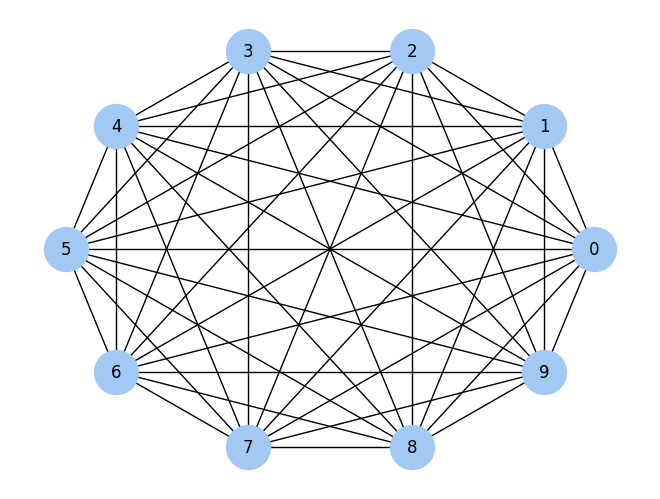

In [ ]:
nx.draw_circular(complete,
                 node_color='C0',
                 node_size=1000,
                 with_labels=True)

The `neighbors` method the neighbors for a given node.

In [ ]:
list(complete.neighbors(0))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

# Generating ER Graphs


The ER graph $G(n,p)$ contains $n$ nodes, and each pair of nodes is connected by an edge with probability $p$.

The helper function `flip` returns True with probability `p` and False with probability `1-p`

Numpy `random` returns a number between 0 and 1 ([Numpy random documentation](https://numpy.org/doc/1.16/reference/generated/numpy.random.random.html)).

In [ ]:
def flip(p):
    return np.random.random() < p

`random_pairs` is a generator function that enumerates all possible pairs of nodes and yields each one with probability `p`

In [ ]:
def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i < j:
                yield u, v

def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge

`make_random_graph` makes an ER graph where the probability of an edge between each pair of nodes is `p`.

In [ ]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

Here's an example with `n=10` and `p=0.3`

In [ ]:
np.random.seed(10)

random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())


12

In [ ]:
list(random_graph.edges())

[(0, 2),
 (0, 6),
 (0, 7),
 (0, 9),
 (1, 2),
 (1, 5),
 (2, 3),
 (2, 7),
 (4, 9),
 (5, 7),
 (5, 9),
 (7, 8)]

draw the random graph

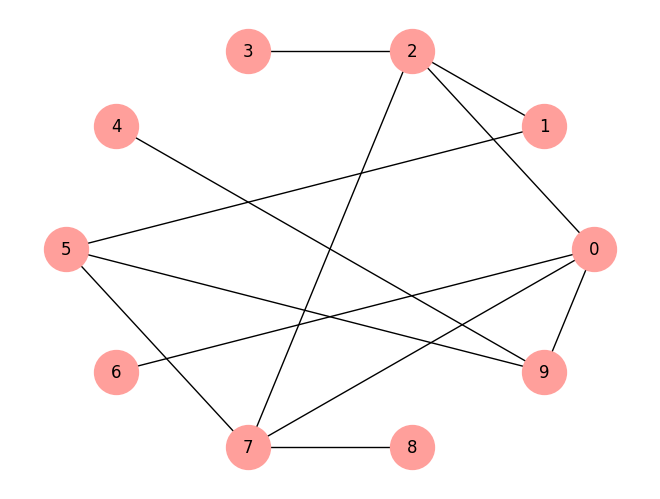

In [ ]:
nx.draw_circular(random_graph,
                 node_color='C3',
                 node_size=1000,
                 with_labels=True)
plt.show()

Let's generate a new random graph with `p=0.1`

In [ ]:
np.random.seed(10)

new_random_graph = make_random_graph(10, 0.1)
len(new_random_graph.edges())

5

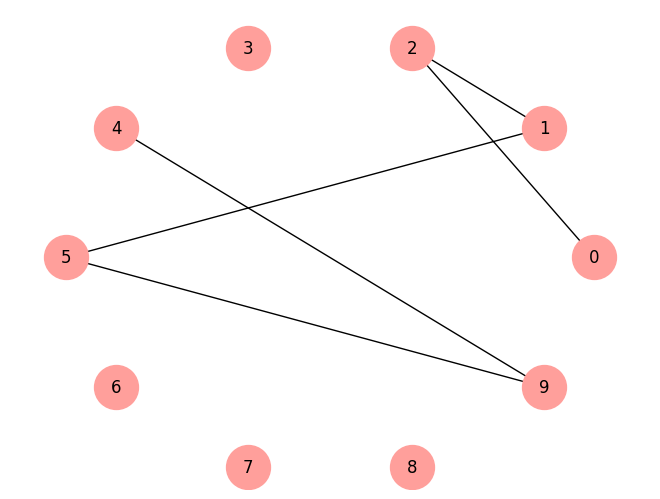

In [ ]:
nx.draw_circular(new_random_graph,
                 node_color='C3',
                 node_size=1000,
                 with_labels=True)
plt.show()

# Connectivity

To check whether a graph is connected, we'll start by finding all nodes that can be reached, starting with a given node:

In [ ]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen


In the complete graph, starting from node 0, we can reach all nodes:

In [ ]:
reachable_nodes(complete, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In the random graph we generated, we can also reach all nodes (but that's not always true):

In [ ]:
reachable_nodes(random_graph, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

We can use `reachable_nodes` to check whether a graph is connected:

In [ ]:
def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

Again, the complete graph is connected:

In [ ]:
is_connected(complete)

True

Is the random graph we first created connected?

In [ ]:
is_connected(random_graph)

True

But if we generate a random graph with a low value of `p`, it's not:

In [ ]:
new_random_graph = make_random_graph(10, 0.1)
len(new_random_graph.edges())

5

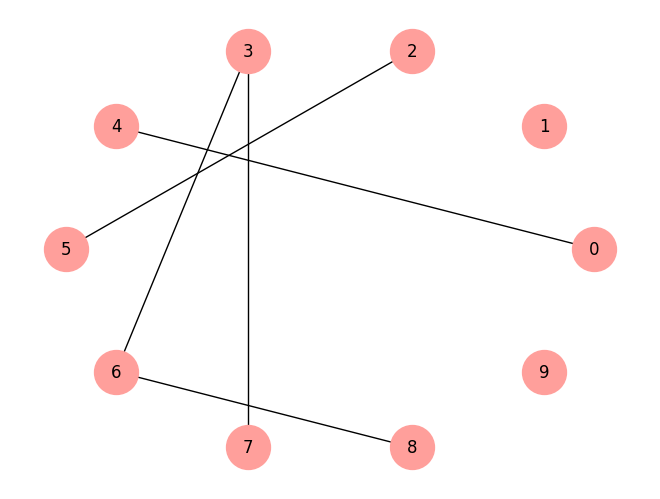

In [ ]:
nx.draw_circular(new_random_graph,
                 node_color='C3',
                 node_size=1000,
                 with_labels=True)
plt.show()

In [ ]:
is_connected(new_random_graph)

False

# Probability of connectivity

Now let's estimare the probability that a randomly-generated ER graph is connected.

This function takes `n` and `p`, generates `iters` graphs, and returns the fraction of them that are connected.

In [ ]:
# version with a for loop

def prob_connected(n, p, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_random_graph(n, p)
        if is_connected(random_graph):
            count += 1
    return count/iters

In [ ]:
# version with a list comprehension

def prob_connected(n, p, iters=100):
    tf = [is_connected(make_random_graph(n, p))
          for i in range(iters)]
    return np.mean(tf)

With `n=10` and `p=0.23`, the probability of being connected is about 33%.

In [ ]:
np.random.seed(17)

n = 10
prob_connected(n, 0.23, iters=10000)

0.3393

According to Erdos and Renyi, the critical value of `p` for `n=10` is about 0.23.

In [ ]:
pstar = np.log(n) / n
pstar

0.23025850929940458

So let's plot the probability of connectivity for a range of values for `p`

In [ ]:
ps = np.logspace(-1.3, 0, 11)
ps

array([0.05011872, 0.0676083 , 0.09120108, 0.12302688, 0.16595869,
       0.22387211, 0.30199517, 0.40738028, 0.54954087, 0.74131024,
       1.        ])

I'll estimate the probabilities with `iters=1000`

In [ ]:
ys = [prob_connected(n, p, 1000) for p in ps]

for p, y in zip(ps, ys):
    print(p, y)

0.05011872336272722 0.0
0.06760829753919818 0.0
0.09120108393559097 0.004
0.12302687708123815 0.016
0.16595869074375605 0.109
0.22387211385683395 0.346
0.3019951720402016 0.664
0.40738027780411273 0.899
0.5495408738576245 0.989
0.7413102413009173 1.0
1.0 1.0


And then plot them, adding a vertical line at the computed critical value

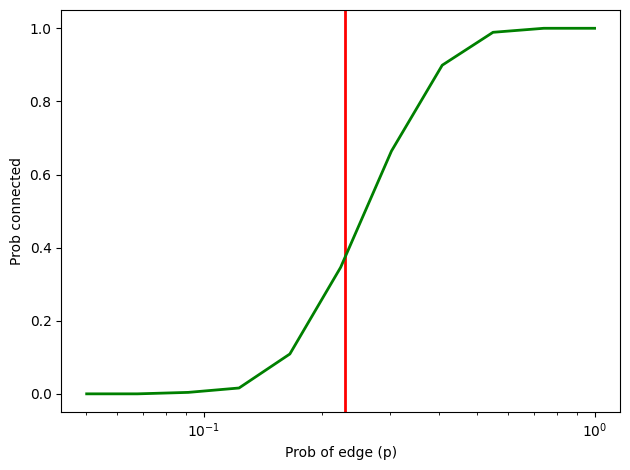

In [ ]:
plt.axvline(pstar, color='red')
plt.plot(ps, ys, color='green')
decorate(xlabel='Prob of edge (p)',
                 ylabel='Prob connected',
                 xscale='log')
plt.show()

We can run the same analysis for a few more values of `n`.

300
100
30


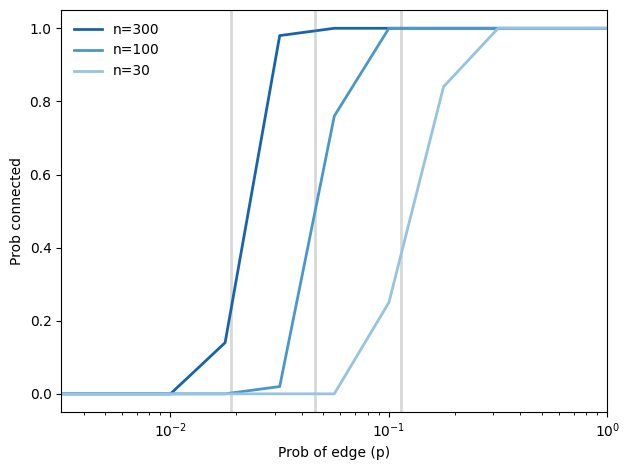

In [ ]:
ns = [300, 100, 30]
ps = np.logspace(-2.5, 0, 11)

sns.set_palette('Blues_r', 4)
for n in ns:
    print(n)
    pstar = np.log(n) / n
    plt.axvline(pstar, color='gray', alpha=0.3)

    ys = [prob_connected(n, p) for p in ps]
    plt.plot(ps, ys, label='n=%d' % n)

decorate(xlabel='Prob of edge (p)',
         ylabel='Prob connected',
         xscale='log',
         xlim=[ps[0], ps[-1]],
         loc='upper left')


As `n` increases, the critical value gets smaller and the transition gets more abrupt.

# Exercises
**Please try the exercises yourself before checking the solution.**

**Exercise:** In the implementation of `reachable_nodes`, you might be bothered by the apparent inefficiency of adding ***all*** neighbors to the stack without checking whether they are already in `seen`.  Write a version of this function that checks the neighbors before adding them to the stack.  

In [ ]:
def reachable_nodes_precheck(G, start):
    # FILL THIS IN
    return

**Exercise:** There are actually two kinds of ER graphs.  The one we generated in the chapter, $G(n, p)$, is characterized by two parameters, the number of nodes and the probability of an edge between nodes.

An alternative definition, denoted $G(n, m)$, is also characterized by two parameters: the number of nodes, $n$, and the number of edges, $m$.  Under this definition, the number of edges is fixed, but their location is random.

Repeat the experiments we did in this chapter using this alternative definition.  Here are a few suggestions for how to proceed:

1. Write a function called `m_pairs` that takes a list of nodes and the number of edges, $m$, and returns a random selection of $m$ edges.  A simple way to do that is to generate a list of all possible edges and use `random.sample`. (check the documentation for [random.sample](https://python.readthedocs.io/en/stable/library/random.html))

2. Write a function called `make_m_graph` that takes $n$ and $m$ and returns a random graph with $n$ nodes and $m$ edges.

3. Make a version of `prob_connected` that uses `make_m_graph` instead of `make_random_graph`.

4. Compute the probability of connectivity for a range of values of $m$.

How do the results of this experiment compare to the results using the first type of ER graph?

In [ ]:
# Solution goes here

In [ ]:
m_graph.number_of_edges()

In [ ]:
# Solution goes here

In [ ]:
# Solution goes here

## **sample solution**




Solution for Exercise 1

In [ ]:
# Solution

def reachable_nodes_precheck(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            neighbors = set(G[node]) - seen
            stack.extend(neighbors)
    return seen

Solution for Exercise 2

1.0444444444444445
1.0454545454545454
1.0465116279069768
1.0476190476190477
1.048780487804878
1.05
1.0512820512820513
1.0526315789473684
1.054054054054054
1.0555555555555556
1.0571428571428572
1.0588235294117647
1.0606060606060606
1.0625
1.064516129032258
1.0666666666666667
1.0689655172413792
1.0714285714285714
1.0740740740740742
1.0769230769230769
1.08
1.0833333333333333
1.0869565217391304
1.0909090909090908
1.0952380952380953
1.1
1.105263157894737
1.1111111111111112
1.1176470588235294
1.125
1.1333333333333333
1.1428571428571428
1.1538461538461537
1.1666666666666667
1.1818181818181819
1.2
1.2222222222222223
1.25
1.2857142857142858
1.3333333333333333
1.4
1.5
1.6666666666666667
2.0
3.0


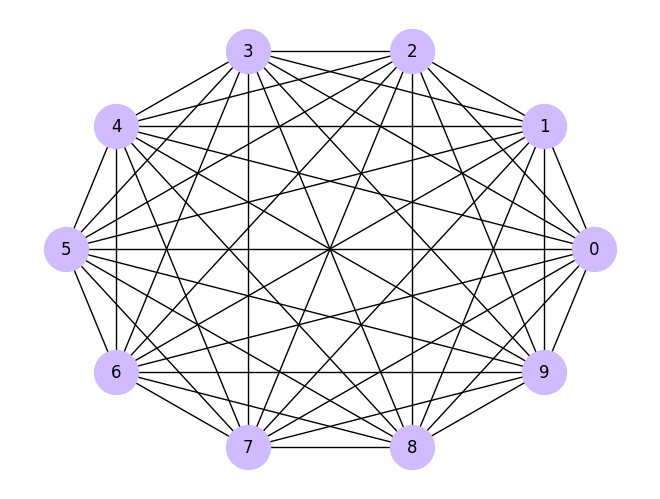

In [ ]:
# Solution

colors = sns.color_palette('pastel', 5)
sns.set_palette(colors)

import random

def m_pairs(nodes, m):
    pairs = list(all_pairs(nodes))
    return random.sample(pairs, m)

def all_edges(nodes):
    for u in nodes:
        for v in nodes:
            if u < v:
                yield u, v

def m_pairs(nodes, m):
    n = len(nodes)
    num = m
    den = n * (n-1) / 2
    for edge in all_edges(nodes):
        p = num / den
        print(p)
        if flip(p):
            num -= 1
            den -= 1
            yield edge
        else:
            den -= 1

def make_m_graph(n, m):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(m_pairs(nodes, m))
    return G

m_graph = make_m_graph(10, 47)

nx.draw_circular(m_graph,
                 node_color='C4',
                 node_size=1000,
                 with_labels=True)

In [ ]:
m_graph.number_of_edges()

45

In [ ]:
# Solution

def prob_m_connected(n, m, iters=100):
    count = 0
    for i in range(iters):
        m_graph = make_m_graph(n, m)
        if is_connected(m_graph):
            count += 1
    return count/iters

n = 10
pstar = np.log(n) / n
ps = np.logspace(-1.3, 0, 11)
ms = [int(p * n * (n-1) / 2) for p in ps]
ys = [prob_m_connected(n, m, 100) for m in ms]

for p, m, y in zip(ps, ms, ys):
    print(p, m, y)

Streaming output truncated to the last 5000 lines.
0.717948717948718
0.7105263157894737
0.7027027027027027
0.6944444444444444
0.6857142857142857
0.6764705882352942
0.6666666666666666
0.65625
0.6451612903225806
0.6333333333333333
0.6551724137931034
0.6785714285714286
0.6666666666666666
0.6923076923076923
0.72
0.7083333333333334
0.7391304347826086
0.7727272727272727
0.8095238095238095
0.85
0.8421052631578947
0.8333333333333334
0.8235294117647058
0.875
0.8666666666666667
0.8571428571428571
0.8461538461538461
0.8333333333333334
0.8181818181818182
0.8
0.8888888888888888
0.875
0.8571428571428571
0.8333333333333334
0.8
0.75
0.6666666666666666
1.0
1.0
0.7333333333333333
0.75
0.7674418604651163
0.7619047619047619
0.7560975609756098
0.775
0.7948717948717948
0.7894736842105263
0.7837837837837838
0.7777777777777778
0.7714285714285715
0.7647058823529411
0.7575757575757576
0.75
0.7419354838709677
0.7333333333333333
0.7241379310344828
0.75
0.7407407407407407
0.7692307692307693
0.76
0.7916666666666666

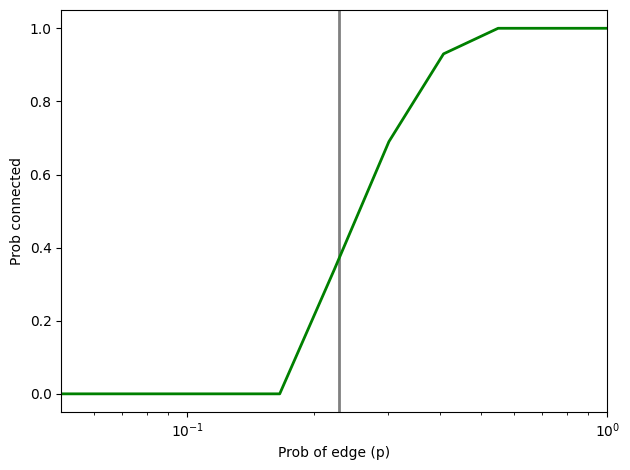

In [ ]:
# Solution

plt.axvline(pstar, color='gray')
plt.plot(ps, ys, color='green')
decorate(xlabel='Prob of edge (p)',
         ylabel='Prob connected',
         xscale='log',
         xlim=[ps[0], ps[-1]])